## 项目: AI智能识题


- **实验任务**：给定数学题目，确定此类数学题目是“三角函数与解三角函数”这类题目，还是“函数与导数”这类题目。
- **实验步骤**：    
                        1. 对数据进行探索，搞明白数据之间的关系。
                        2. 清洗数据，对文本数据进行处理。
                            a. 过滤出中文单词。
                            b. 过滤出latex中有意义的符号。
                            c. 过滤出题目中插图信息。
                            d. 使用jieba进行中文分词。
                            e. 使用stopwords过滤常用停用词。
                        3. 生成样本数据和标签。
                        4. 使用tfidf生成文档向量。
                        5. 选择模型进行交叉验证和网格搜索。
                        6. 模型的集成。
                        7. 画出ROC曲线。


## 步骤一：数据的探索

对数据进行探索，搞明白
-  knowledge_hierarchy
- question_knowledge_hierarchy_sx
- tk_answer_option_sx
- tiku_question_sx

之间的关系，找到“三角函数与解三角形”和“函数与导数”的知识点数据

****程玉卿****

In [1]:
## 请不要修改下方代码
# 导入依赖库
import pandas as pd
import numpy as np
#加载数据
data = pd.read_csv('camp_dataset/data/tiku_question_sx.csv')
#改变数据索引
#data为所有问题的数据
#label为所有问题的标签
data.set_index('que_id',inplace=True)
label = pd.read_csv('camp_dataset/data/question_knowledge_hierarchy_sx.csv')

/Users/chengyuqing/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (26,27,28,29,30,31,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
label.rename(columns={'question_id':'que_id'},inplace=True)

In [3]:
data.head()

,parent_id,root_id,subject_id,grade_group_id,qt_id,wqt_id,ks_id,mqt_ids,mqt_name,voice_text,...,bx_answer,que_creater_source,que_desc,blank_answer,blank_disponse,is_private,private_time,dispose_person_id,order_id,is_init_know
que_id,,,,,,,,,,,,,,,,,,,,,
0001a4509d9e4d069f5c651b816a80a6,0,0,2,3,1,13f97b02f7e4f2c9d35ec1af3c2d1001,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,0,0,2017-07-20 18:31:37,NaN,NaN,0
0001bd9da0ed4230a6c853bdfc7e7c74,1ba300886865420ba2f117906dc51f51,1ba300886865420ba2f117906dc51f51,2,3,8,13f97b02f7e4f2c9d35ec1af3c2d1003,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,0,0,2017-01-11 21:35:23,NaN,NaN,0
0001f7f83edf44e6a937bd49f020dc1f,8f9be8fe935045ee90eb78c346cb2854,8f9be8fe935045ee90eb78c346cb2854,2,3,1,13f97b02f7e4f2c9d35ec1af3c2d1003,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,0,0,2017-10-10 00:00:00,NaN,91d31c377a85423396ac2d5e80f8ae88,0
00025da5c33c49a7949247a099664ed8,6d4079a54c4945daafc1f396d3388f8d,6d4079a54c4945daafc1f396d3388f8d,2,3,8,13f97b02f7e4f2c9d35ec1af3c2d1003,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,0,0,2016-05-16 10:19:21,NaN,NaN,0
000297a6dffb4d31a62f36cd5206441b,0,0,2,3,9,13f97b02f7e4f2c9d35ec1af3c2d1003,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,0,0,2017-10-30 18:15:46,NaN,NaN,0


In [4]:
dl_merge=pd.merge(data,label,how='inner',on='que_id')
dl_merge.head()

,que_id,parent_id,root_id,subject_id,grade_group_id,qt_id,wqt_id,ks_id,mqt_ids,mqt_name,...,blank_answer,blank_disponse,is_private,private_time,dispose_person_id,order_id,is_init_know,id,kh_id,create_time
0,0001a4509d9e4d069f5c651b816a80a6,0,0,2,3,1,13f97b02f7e4f2c9d35ec1af3c2d1001,NaN,NaN,NaN,...,NaN,0,0,2017-07-20 18:31:37,NaN,NaN,0,4fea6a6f34e94f2b889146c489285301,hcwf4avcmp8l53s5iq010pelwlce0035,2017-11-21 00:00:00
1,0001a4509d9e4d069f5c651b816a80a6,0,0,2,3,1,13f97b02f7e4f2c9d35ec1af3c2d1001,NaN,NaN,NaN,...,NaN,0,0,2017-07-20 18:31:37,NaN,NaN,0,70d2715532ca4de7be29dcae14c011f8,1488a9f33b294046b0af671c20e5b370,2017-11-21 00:00:00
2,0001a4509d9e4d069f5c651b816a80a6,0,0,2,3,1,13f97b02f7e4f2c9d35ec1af3c2d1001,NaN,NaN,NaN,...,NaN,0,0,2017-07-20 18:31:37,NaN,NaN,0,98bf0288ebcc46118ce11e651deb24a7,hcwf4avcmp8l53s5iq010pelwlce0041,2017-11-21 00:00:00
3,0001bd9da0ed4230a6c853bdfc7e7c74,1ba300886865420ba2f117906dc51f51,1ba300886865420ba2f117906dc51f51,2,3,8,13f97b02f7e4f2c9d35ec1af3c2d1003,NaN,NaN,NaN,...,NaN,0,0,2017-01-11 21:35:23,NaN,NaN,0,12ac683ebed044faa985e58b981c166d,hcwf4avcmp8l53s5iq010pelwlce000e,2017-11-21 00:00:00
4,0001bd9da0ed4230a6c853bdfc7e7c74,1ba300886865420ba2f117906dc51f51,1ba300886865420ba2f117906dc51f51,2,3,8,13f97b02f7e4f2c9d35ec1af3c2d1003,NaN,NaN,NaN,...,NaN,0,0,2017-01-11 21:35:23,NaN,NaN,0,9ebfed58e3294f85b68bd50ecded1a2b,hcwf4avcmp8l53s5iq010pelwlce000f,2017-11-21 00:00:00


In [5]:
df_kh=pd.read_csv('camp_dataset/data/knowledge_hierarchy.csv')
df_kh.rename(columns={'id':'kh_id'}, inplace = True)
#提取我们所关心的题目数据
df_kh1=df_kh[df_kh['name']=="三角函数与解三角形"]
df_kh2=df_kh[df_kh['name']=="函数与导数"]

In [6]:
#融合成含有三角函数的数据
data_triangle_all=pd.merge(df_kh1,dl_merge,how='left',on='kh_id')
data_triangle_all.columns

Index(['kh_id', 'name', 'parent_id_x', 'degree', 'subject_id_x', 'grade_id',
       'create_id', 'modify_id', 'create_time_x', 'modify_time', 'sort_x',
       'sign', 'new_subject_id', 'root_id_x', 'que_id', 'parent_id_y',
       'root_id_y', 'subject_id_y', 'grade_group_id', 'qt_id', 'wqt_id',
       'ks_id', 'mqt_ids', 'mqt_name', 'voice_text', 'content', 'answer',
       'analysis', 'key_word', 'difficulty', 'sort_y', 'state', 'conversion',
       'mutual', 'mark', 'creater_id', 'create_date', 'modifier_id',
       'modify_date', 'note', 'first_audit_time', 'first_auditor_id',
       'first_auditor_name', 'second_audit_time', 'second_auditor_id',
       'second_auditor_name', 'translatid_text', 'video_url', 'gif_url',
       'reference_que_id', 'svg_mark', 'duplicate_flag', 'deprecated',
       'bx_answer', 'que_creater_source', 'que_desc', 'blank_answer',
       'blank_disponse', 'is_private', 'private_time', 'dispose_person_id',
       'order_id', 'is_init_know', 'id', 'create_tim

In [7]:
#融合成含有函数题的数据
data_function_all=pd.merge(df_kh2,dl_merge,how='left',on='kh_id')
data_function_all.head()

,kh_id,name,parent_id_x,degree,subject_id_x,grade_id,create_id,modify_id,create_time_x,modify_time,...,que_desc,blank_answer,blank_disponse,is_private,private_time,dispose_person_id,order_id,is_init_know,id,create_time_y
0,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0,1,16.0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,2017-01-11 21:35:23,NaN,NaN,0,e872555e30174dcd87761e4bb9d49466,2017-11-21 00:00:00
1,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0,1,16.0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,2017-10-30 18:15:46,NaN,NaN,0,a975fe6cc7a24d75917f82725ed98bd3,2017-11-21 00:00:00
2,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0,1,16.0,3,NaN,NaN,NaN,NaN,...,NaN,"{""answer"":[{""id"":0,""content"":[{""content"":""$$\\...",1,0,2018-04-03 00:44:29,NaN,NaN,0,66d116fd856d48dd85bb75cb933dcb07,2018-04-03 00:44:28
3,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0,1,16.0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,2017-11-30 18:20:57,NaN,NaN,0,76c44725ee6a43a0b82ddbc0493f5ea6,2017-11-30 18:20:56
4,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0,1,16.0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,2017-10-22 14:16:33,NaN,NaN,0,cc926f40ceb24a3f8425bc9d3253b864,2017-11-21 00:00:00


In [8]:
data_function_all.head()

,kh_id,name,parent_id_x,degree,subject_id_x,grade_id,create_id,modify_id,create_time_x,modify_time,...,que_desc,blank_answer,blank_disponse,is_private,private_time,dispose_person_id,order_id,is_init_know,id,create_time_y
0,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0,1,16.0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,2017-01-11 21:35:23,NaN,NaN,0,e872555e30174dcd87761e4bb9d49466,2017-11-21 00:00:00
1,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0,1,16.0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,2017-10-30 18:15:46,NaN,NaN,0,a975fe6cc7a24d75917f82725ed98bd3,2017-11-21 00:00:00
2,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0,1,16.0,3,NaN,NaN,NaN,NaN,...,NaN,"{""answer"":[{""id"":0,""content"":[{""content"":""$$\\...",1,0,2018-04-03 00:44:29,NaN,NaN,0,66d116fd856d48dd85bb75cb933dcb07,2018-04-03 00:44:28
3,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0,1,16.0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,2017-11-30 18:20:57,NaN,NaN,0,76c44725ee6a43a0b82ddbc0493f5ea6,2017-11-30 18:20:56
4,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0,1,16.0,3,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,2017-10-22 14:16:33,NaN,NaN,0,cc926f40ceb24a3f8425bc9d3253b864,2017-11-21 00:00:00


### 编程练习
你需要从data和label中获取“三角函数与解三角形”和“函数与导数”的数据

In [9]:
#删去多余的列
data_triangle_all.drop(['parent_id_x', 'degree', 'subject_id_x', 'grade_id',
       'create_id', 'modify_id', 'create_time_x', 'modify_time', 'sort_x',
       'sign', 'new_subject_id', 'root_id_x', 'parent_id_y',
       'root_id_y', 'subject_id_y', 'grade_group_id', 'qt_id', 'wqt_id',
       'ks_id', 'mqt_ids', 'mqt_name', 'voice_text',  'key_word', 'difficulty', 'sort_y', 'state', 'conversion',
       'mutual', 'mark', 'creater_id', 'create_date', 'modifier_id',
       'modify_date', 'note', 'first_audit_time', 'first_auditor_id',
       'first_auditor_name', 'second_audit_time', 'second_auditor_id',
       'second_auditor_name', 'translatid_text', 'video_url', 'gif_url',
       'reference_que_id', 'svg_mark', 'duplicate_flag', 'deprecated',
       'bx_answer', 'que_creater_source', 'que_desc', 'blank_answer',
       'blank_disponse', 'is_private', 'private_time', 'dispose_person_id',
       'order_id', 'is_init_know', 'id', 'create_time_y'],axis=1,inplace=True)
data_function_all.drop(['parent_id_x', 'degree', 'subject_id_x', 'grade_id',
       'create_id', 'modify_id', 'create_time_x', 'modify_time', 'sort_x',
       'sign', 'new_subject_id', 'root_id_x', 'parent_id_y',
       'root_id_y', 'subject_id_y', 'grade_group_id', 'qt_id', 'wqt_id',
       'ks_id', 'mqt_ids', 'mqt_name', 'voice_text',  'key_word', 'difficulty', 'sort_y', 'state', 'conversion',
       'mutual', 'mark', 'creater_id', 'create_date', 'modifier_id',
       'modify_date', 'note', 'first_audit_time', 'first_auditor_id',
       'first_auditor_name', 'second_audit_time', 'second_auditor_id',
       'second_auditor_name', 'translatid_text', 'video_url', 'gif_url',
       'reference_que_id', 'svg_mark', 'duplicate_flag', 'deprecated',
       'bx_answer', 'que_creater_source', 'que_desc', 'blank_answer',
       'blank_disponse', 'is_private', 'private_time', 'dispose_person_id',
       'order_id', 'is_init_know', 'id', 'create_time_y'],axis=1,inplace=True)


In [10]:
#将data_triangle(三角函数与解三角形),data_function(函数与导数)分别赋值
data_triangle=data_triangle_all.copy()
data_function=data_function_all.copy()

In [11]:
#探索数据，打印出data_triangle和data_function的部分题目
data_triangle.head()

,kh_id,name,que_id,content,answer,analysis
0,hcwf4avcmp8l53s5iq010pelwlce0035,三角函数与解三角形,0001a4509d9e4d069f5c651b816a80a6,<p>在$$\triangle ABC$$中，$$AB=\sqrt{3}$$，$$AC=1$...,B,<p>$${{S}_{\triangle ABC}}=\frac{1}{2}\times A...
1,hcwf4avcmp8l53s5iq010pelwlce0035,三角函数与解三角形,0018a4cb687d46fb81b047f1b35e27e4,<p>$$\cos \alpha +\frac{1}{\sin \alpha }$$；</p>,<p>$$k \pi (k\in \mathbf{Z})$$．</p>,NaN
2,hcwf4avcmp8l53s5iq010pelwlce0035,三角函数与解三角形,0018feec97e246adb1ccdb0a0bc22bef,"<p>若$$\theta \in \left( 0,\frac{ \pi }{2} \rig...",<p>见解析．</p>,<p>∵$$f(\theta )=\frac{1}{2}$$，</p>\r\n<p>&the...
3,hcwf4avcmp8l53s5iq010pelwlce0035,三角函数与解三角形,001bfaffc89a4d3490b5528fd9cf802c,<p>已知函数$$f(x)={{\sin }^{2}}2x+\sqrt{3}\sin 2x\...,NaN,NaN
4,hcwf4avcmp8l53s5iq010pelwlce0035,三角函数与解三角形,001d97674fae40209f82cb33a12ce6a3,"<p>若曲线$$f(x,y)=0$$上两个不同处的切线重合，则称这条切线为曲线$$f(x,y...",B,<p>根据&ldquo;自公切线&rdquo;的定义知，过曲线外一点作曲线的切线，该切线与曲...


In [12]:
data_function.head()

,kh_id,name,que_id,content,answer,analysis
0,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0001bd9da0ed4230a6c853bdfc7e7c74,<p>问函数$$\phi \left( x \right)=\sqrt{\frac{a}{{...,"<p>能，$$a$$的取值范围是$$[15-10\sqrt{2},15+10\sqrt{2}...",<p>由题意，$$a&gt;0$$，$$D=\mathbf{R}$$．存在实数$${{x}_...
1,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,000297a6dffb4d31a62f36cd5206441b,<p>某投资公司计划投资$$A$$，$$B$$两种金融产品，根据市场调查与预测，$$A$$产...,NaN,NaN
2,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0003eb6743e54fd3a6fa57168654afb8,<p>函数$$f\left( x \right)=\sqrt{4-{{2}^{k}}}+\s...,"$$\left[ 0,2 \right]$$",<p>$$\begin{cases}4-{{2}^{x}}\geqslant 0 \\ x\...
3,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,0006d09c14514f28ab6fcf8484cdb10b,<p>若函数$$f(x)(x\in \mathbf{R})$$是周期为$$4$$的奇函数，且...,C,<p>依题意得$$f\left( \frac{29}{4} \right)=f\left( ...
4,hcwf4avcmp8l53s5iq010pelwlce000d,函数与导数,00073bb01b63495f807cd169a862d94e,<p>过坐标原点$$O$$作曲线$$y=f(x)$$的切线，求切线的横坐标．</p>,<p>$$1$$．</p>,"<p>不妨设$$tP$$点为$$M(t,f(t))$$，$${{f}^{\prime }}(..."


## 步骤二：清洗题目数据和特征工程


原题目的样子如下：


<img src="img1.png" style="width:700px;height:100px;float:left">

~~~





 **题目含义**
- ‘$’符号表示latex语法
- <／p>表示html语法
- <／img>表示是否插入有图片，后面跟着图片的地址

**过滤方法：**

- 使用re正则表达式过滤掉中文。
- 从latex语法中保留部分代码
- 记录题目是否有图片

参考资料：正则表达式学习资料

[什么是正则表达](http://www.runoob.com/python/python-reg-expressions.html)

[正则表达语法汇总](http://www.runoob.com/python/python-reg-expressions.html)

[Python正则表达式匹配反斜杠'\'问题](https://www.cnblogs.com/mzc1997/p/7689235.html)

In [13]:
## 请不要修改下方代码
import re#导入re库
import jieba#导入jieba库
math_words = ['Delta','angle','arccos','arcsin','arctan','bar','bot','cap','cdot','centerdot','circ','cos','cup','dfrac','exists','forall','frac','frown','grave','infty','int','lg','lim','ln','log','max','min','neg','odot','oplus','otimes','overline','partial','pi','prime','prod','sec','csc','sin','subset','subseteq','subsetneqq','supseteq','tan','triangle','tfrac','wedge','widehat','vee']#定义一个列表，包含与标签相关的文本词
zh_pattern = re.compile(u'[\u4e00-\u9fa5]+')#编译正则表达式，至少匹配一个汉字（u4e00,u9fa5分别是unicode表中汉字范围的第一个和最后一个，‘【】’表示里面的值出现一次即可，‘+’表示至少出现一次）
img_pattern = re.compile(u'<img')#编译正则表达式，匹配img格式
math_pattern = re.compile(u'\\\\([a-zA-Z]+)')#编译正则表达式，匹配反斜杠和全部大小写字母
stop_word = pd.read_csv('stopwords-master/中文停用词表.txt',header=None)#导入中文停用词表文件
stop_word = stop_word.values.reshape(-1)#可以理解为转置，将dataframe转化成一维数组
stop_word = [stop.encode('utf8') for stop in stop_word]#将stop_word里的汉字和数字以及标点符号解码（按照utf8的编码）
stop_word.append(' ')#在数组末尾加上空格
def extract_words(word):#定义一个名为extract_words的函数
    zh_word = re.findall(zh_pattern,word)#返回word中存在的所有汉字
    img_word = re.findall(img_pattern,word)#返回word中存在的img（图片）
    math_word = re.findall(math_pattern,word)#返回word中所有的大小写字母和反斜杠
    math_word = [char for char in math_word if char  in math_words]#保留同时存在在math_word和math_words里的字符串
    lst=jieba.cut(' '.join(zh_word))#利用jieba库将有实际意义的中文词用空格隔开
    final_word = [char for char in lst if char not in stop_word]+img_word+math_word#把停用词（无用词）删去，连接上图片和数学词（英文）
    return  ' '.join(final_word)#返回空格隔开的final_word
tri_data = data_triangle.content.apply(lambda x:extract_words(x))#对data_triangle运用上述定义的函数
fun_data = data_function.content.apply(lambda x:extract_words(x))#对data_function运用上述定义的函数

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_s/zh4ppb_97hj9n3yvdbfldb7m0000gn/T/jieba.cache
Loading model cost 1.220 seconds.
Prefix dict has been built succesfully.


In [87]:
#找出所有的\XXX 
math_word1=re.findall(math_pattern,str(data_triangle_all.content))
math_word2=re.findall(math_pattern,str(data_function_all.content))
print(set(math_word1+math_word2))
#注：因为上面的math——words中的符号跟我们目的的三角函数题目和函数与导数有极大的相关性，可以利用内容里包含的这些数学符号对题目所属的种类进行准确的判断。
### TODO：这样数据清洗和过滤的原因。
#清除那些对我们目的无帮助的汉字，数字和标点符号，留下那些有实义的汉字，和数学符号和图片，方便我们利用这些特征对题目所属的种类进行预测和分类。

{'theta', 'begin', 'omega', 'p', 'sqrt', 'rig', 'circ', 'ri', 'f', 'in', 'mathbf', 'left', 'l', 'frac', 'cos', 'leqslant', 'log', 'phi', 's', 'sq', 'right', 'mat', 'ne', 'ln', 'infty', 't', 'forall', 'cdot', 'pi', 'fr', 'n', 'tan', 'geqslant', 'triangle', 'sin', 'r', 'alpha', 'text'}


## 步骤三：生成样本数据和标签

经过对数据的探索，你会发现有如下问题：

1. “三角函数与解三角形”和“函数与导数”的知识点的题目数据是有交集的，即有的题目即属于“三角函数与解三角形”也属于“函数与导数”，我们需要过滤掉交集部分。
2. 清洗数据后可能存在空字符串数据，所以需要过滤掉空字符串数据。

<img src="img2.png" style="width:500px;height:200px;float:left">

In [15]:
##TODO：df_all如上图所示
data_triangle['content']=tri_data
data_function['content']=fun_data

In [16]:
list1=data_triangle['que_id'].values.reshape(-1)
list2=data_function['que_id'].values.reshape(-1)
list_repeat=[]
for i in list1:
    if i in list2:
        list_repeat.append(i)#选择出交集部分

In [17]:
len(list_repeat)#看交集的个数有多少，决定采取怎样的过滤方式

1642

In [18]:
data_triangle=data_triangle[~data_triangle['que_id'].isin(list_repeat)]
data_function=data_function[~data_function['que_id'].isin(list_repeat)]#交集部分数目比例较少，直接删去

In [19]:
df_previous_all=data_triangle.append(data_function)
df_previous_all.info()#查看信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38776 entries, 0 to 30160
Data columns (total 6 columns):
kh_id       38776 non-null object
name        38776 non-null object
que_id      38776 non-null object
content     38776 non-null object
answer      32743 non-null object
analysis    33172 non-null object
dtypes: object(6)
memory usage: 2.1+ MB


In [20]:
df_all=df_previous_all.drop(['kh_id','answer','analysis'],axis=1)#进一步删去无用列
df_all.head()
df_all['label']=(df_all['name']=="三角函数与解三角形").astype(int)#设置好标签（‘1’对应三角函数与解三角形，‘0’对应函数与导数）

In [21]:
df_all=df_all.drop(['name'],axis=1)

In [22]:
df_all.head()#查看数据

,que_id,content,label
0,0001a4509d9e4d069f5c651b816a80a6,在 中 则 的 面积 等于 triangle angle circ triangle,1
1,0018a4cb687d46fb81b047f1b35e27e4,cos frac sin,1
2,0018feec97e246adb1ccdb0a0bc22bef,若 且 求 的 值 frac pi frac sin,1
3,001bfaffc89a4d3490b5528fd9cf802c,已知 函数 sin sin cdot cos,1
4,001d97674fae40209f82cb33a12ce6a3,若 曲线 上 两个 不同 处 的 切线 重合 则 称 这条 切线 为 曲线 的 自 公切线 ...,1


## 步骤四：Tf-IDF生成文档向量

我们使用sklearn的工具来生成Tf-IDF的文档向量，可以理解为把文档的文本数据生成向量数据。
[TF-IDF资料](http://www.ruanyifeng.com/blog/2013/03/tf-idf.html)

In [61]:
## 请不要修改下方代码
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
counter = CountVectorizer(max_df=0.8,min_df=0.001)
counts = counter.fit_transform(df_all.content)
tfidfer = TfidfTransformer()
tfidf = tfidfer.fit_transform(counts)
data=tfidf.toarray()
label=df_all.label.values

In [24]:
## max_df,min_df这两个参数的意义：
#max_df表示忽略词频在给定值上的词，因为这些词的词频过高往往意味着特异性不够好，无法利用这类词进行有效的判断；
#min_df表示忽略词频在给定值下的词，因为这些词的词频过低会导致利用这一特征进行判断的模型泛化能力降低；

## 步骤五：建立模型

请使用上课的方法，选择合适的模型以及评估方式，使用交叉验证和网格搜索建立模型，并选择合适的参数,打印出交叉验证的结果。

In [25]:
#模型选择、交叉验证、网格搜索
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.1)

/Users/chengyuqing/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/chengyuqing/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [26]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB   
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

/Users/chengyuqing/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [67]:
clf = MultinomialNB()
clf.fit(x_train, y_train) 
pred = clf.predict(x_test)
roc_auc_score(y_score=pred,y_true=y_test)

0.8997111070133381

In [45]:
from sklearn.naive_bayes import GaussianNB   
clf = GaussianNB()
clf.fit(x_train, y_train) 
pred = clf.predict(x_test)
roc_auc_score(y_score=pred,y_true=y_test)


0.8053279907235285

In [69]:
clf = LogisticRegression(random_state=1)
clf.fit(x_train, y_train) 
pred = clf.predict(x_test)
roc_auc_score(y_true=y_test,y_score=pred)


0.9122800285072089

In [75]:
clf =RandomForestClassifier(random_state=1)
clf.fit(x_train, y_train) 
pred = clf.predict(x_test)
roc_auc_score(y_score=pred,y_true=y_test)

0.9287676944877756

综合以上结果，选择multinomialNB,逻辑斯特回归，随机森林

In [49]:
clf_lr=LogisticRegression(random_state=1)
param_grid=[{'C':[1,2,3,4,5,6,7]}]
gs=GridSearchCV(estimator=clf_lr,param_grid=param_grid,scoring='roc_auc',cv=10,n_jobs=-1,verbose=1)
gs.fit(x_train,y_train)
print(gs.grid_scores_)
gs.best_score_
gs.best_params_

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   22.2s finished


[mean: 0.98123, std: 0.00269, params: {'C': 1}, mean: 0.98163, std: 0.00269, params: {'C': 2}, mean: 0.98177, std: 0.00268, params: {'C': 3}, mean: 0.98183, std: 0.00272, params: {'C': 4}, mean: 0.98187, std: 0.00273, params: {'C': 5}, mean: 0.98190, std: 0.00274, params: {'C': 6}, mean: 0.98189, std: 0.00274, params: {'C': 7}]


{'C': 6}

In [64]:
clf_RFC=RandomForestClassifier(random_state=1)
param_RFC=[{'n_estimators':[60,70,80,90,100]}]
gs=GridSearchCV(estimator=clf_RFC,param_grid=param_RFC,scoring='roc_auc',cv=10,n_jobs=-1,verbose=1)
gs.fit(x_train,y_train)
print(gs.grid_scores_)
gs.best_score_
gs.best_params_

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.2min finished


[mean: 0.98505, std: 0.00255, params: {'n_estimators': 60}, mean: 0.98504, std: 0.00256, params: {'n_estimators': 70}, mean: 0.98504, std: 0.00256, params: {'n_estimators': 80}, mean: 0.98507, std: 0.00262, params: {'n_estimators': 90}, mean: 0.98506, std: 0.00256, params: {'n_estimators': 100}]


{'n_estimators': 90}

In [76]:
clf_RFC=RandomForestClassifier(n_estimators=90,random_state=1)
param_RFC= {'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}
gs = GridSearchCV(estimator = clf_RFC,param_grid = param_RFC, scoring='roc_auc',cv=10,n_jobs=-1,verbose=1)
gs.fit(x_train,y_train)
print(gs.grid_scores_)
gs.best_score_
gs.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 51.9min finished


[mean: 0.98434, std: 0.00208, params: {'min_samples_leaf': 1, 'min_samples_split': 2}, mean: 0.98471, std: 0.00195, params: {'min_samples_leaf': 1, 'min_samples_split': 3}, mean: 0.98480, std: 0.00194, params: {'min_samples_leaf': 1, 'min_samples_split': 4}, mean: 0.98453, std: 0.00217, params: {'min_samples_leaf': 2, 'min_samples_split': 2}, mean: 0.98453, std: 0.00217, params: {'min_samples_leaf': 2, 'min_samples_split': 3}, mean: 0.98453, std: 0.00217, params: {'min_samples_leaf': 2, 'min_samples_split': 4}, mean: 0.98366, std: 0.00237, params: {'min_samples_leaf': 3, 'min_samples_split': 2}, mean: 0.98366, std: 0.00237, params: {'min_samples_leaf': 3, 'min_samples_split': 3}, mean: 0.98366, std: 0.00237, params: {'min_samples_leaf': 3, 'min_samples_split': 4}]


{'min_samples_leaf': 1, 'min_samples_split': 4}

In [31]:
clf_mnb=MultinomialNB()
param_mnb={'alpha':[0.2,0.4,0.6,0.8,1.0]}
gs = GridSearchCV(estimator = clf_mnb,param_grid = param_mnb, scoring='roc_auc',cv=10,n_jobs=-1,verbose=1)
gs.fit(x_train,y_train)
print(gs.grid_scores_)
gs.best_score_
gs.best_params_

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.1s finished


[mean: 0.97415, std: 0.00242, params: {'alpha': 0.2}, mean: 0.97412, std: 0.00239, params: {'alpha': 0.4}, mean: 0.97406, std: 0.00241, params: {'alpha': 0.6}, mean: 0.97402, std: 0.00241, params: {'alpha': 0.8}, mean: 0.97398, std: 0.00241, params: {'alpha': 1.0}]


{'alpha': 0.2}

## 步骤六：模型集成
尝试使用stacking等方法对步骤五生成的不同学习器进行集成。

In [58]:
## TODO:模型集成
#用传统的集成方法集成学习器
from sklearn import model_selection
from mlxtend.classifier import EnsembleVoteClassifier

clf_lr=LogisticRegression(C=6,random_state=1)
clf_RFC=RandomForestClassifier(n_estimators=90,random_state=1,min_samples_split=4,min_samples_leaf=1)
clf_mnb=MultinomialNB(alpha=0.2)
Ensemblemodel1 = EnsembleVoteClassifier(clfs=[clf_lr,clf_RFC,clf_mnb], weights=[1,1,1], voting='soft')

for clf, lab in zip([clf_lr,clf_RFC,clf_mnb,Ensemblemodel1],
                         ['Logistic Regression', 'RandomForest','MutinomialNB','Ensemble']):
    scores = model_selection.cross_val_score(clf, x_train, y_train,cv=3, scoring='roc_auc')
    print('lab,roc:{}'.format(scores.mean()))

lab,acc:0.9818439667966028
lab,acc:0.984014494099895
lab,acc:0.9739867616516028
lab,acc:0.9848976345142236


In [64]:
#在测试集上观擦集成模型的预测结果
Ensemblemodel1.fit(x_train, y_train) 
pred = Ensemblemodel1.predict(x_test)
roc_auc_score(y_true=y_test,y_score=pred)

/Users/chengyuqing/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9222720046249459

In [40]:
#利用stacking集成方法
from mlxtend.classifier import StackingClassifier  
lr=LogisticRegression()
Ensemblemodel2= StackingClassifier(classifiers=[clf_lr, clf_RFC,clf_mnb],   
                          meta_classifier=lr)  
  
print('3-fold cross validation:\n')  
  
for clf, label in zip([clf_lr,clf_RFC,clf_mnb,Ensemblemodel2],   
                      ['logistic regression',
                       'Random Forest', 
                       'MutilnomialNB',
                       'StackingClassifier']):  
  
    scores = model_selection.cross_val_score(clf, x_train, y_train,   
                                              cv=3, scoring='roc_auc',n_jobs=-1,verbose=1)  
    print("ROC_AUC: %0.4f (+/- %0.4f) [%s]"   
          % (scores.mean(), scores.std(), label))  

3-fold cross validation:

Accuracy: 0.9818 (+/- 0.0013) [logistic regression]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.7s finished


Accuracy: 0.9840 (+/- 0.0016) [Random Forest]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.2s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished


Accuracy: 0.9740 (+/- 0.0016) [MutilnomialNB]
Accuracy: 0.9434 (+/- 0.0031) [StackingClassifier]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.4s finished


In [51]:
#在测试集上观擦集成模型的预测结果
Ensemblemodel2.fit(x_train, y_train) 
pred = Ensemblemodel2.predict(x_test)
roc_auc_score(y_true=y_test,y_score=pred)

0.9364704553345528

## 步骤七：画出ROC曲线
使用matplotlib对生成好的模型，在测试集上画出ROC曲线。

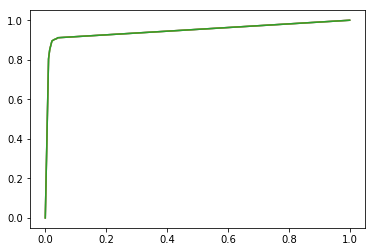

In [63]:
## TODO：ROC曲线
#对上方在测试集上表现最好的Ensemblemodel2进行作图
from sklearn.metrics import roc_curve,auc
from sklearn.cross_validation import StratifiedKFold
from matplotlib import pyplot as plt
kfold=StratifiedKFold(y=label,n_folds=3,random_state=1)
for i,(train,test) in enumerate(kfold):
    prob=Ensemblemodel2.fit(x_train,y_train).predict_proba(x_test)
    fpr,tpr,thresholds=roc_curve(y_test,prob[:,1],pos_label=1)
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label='ROC fold:{},auc:{}'.format(i,roc_auc))